<a href="https://colab.research.google.com/github/kio15978/colab/blob/main/%EC%9C%A0%ED%8C%90%EB%8D%B0_13w_%ED%99%98%EA%B2%BD%EC%97%90_%EB%94%B0%EB%A5%B8_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **환경에 따른 주택 가격 예측하기**

## **목표 : 보스턴 주책 가격 데이터에 머신러닝 기반의 회귀 분석을 수행하여** 

## **주택 가격에 영향을 미치는 환경 변수를 확인하고, 그에 따른 주택 가격을 예측한다.**



---

\

# **< 데이터 수집, 준비 및 탐색 >**

## **1. 데이터 준비**

In [1]:
import numpy as np
import pandas as pd

**사이킷런에서 제공하는 데이터셋 중에서 보스톤 주택 가격 데이터셋을 사용하기 위해**

**load_boston을 임포트, 데이터셋을 로드(load_boston)하여 객체 생성**

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## **2. 데이터셋 구성 확인**

**데이터셋 설명 확인**

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**데이터셋 객체의 data 배열(boston data),**

**즉 독립 변수 x가 되는 특성들을 dataframe 자료형으로 변환하여 boston_df 생성**

In [4]:
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**target 배열, 즉 종속 변수인 주택 가격(PRICE)컬럼을 boston_df에 추가**

In [6]:
boston_df['PRICE'] = boston.target

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**데이터셋 형태(boston_df.shape), 즉 행(데이터)의 개수와 열(변수) 개수를 확인**

In [8]:
print('보스톤 주택 가격 데이터셋 크기:', boston_df.shape)

보스톤 주택 가격 데이터셋 크기: (506, 14)



행 개수 506 -> 데이터가 506개

열 개수가 14 -> 변수가 14개

변수 중에서 13개는 독립 변수 x, 마지막 변수 'PRICE'는 종속 변수 y

**boston_df 정보 확인**

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# **< 분석 모델 구축, 결과 분석 및 시각화 >**

# **선형 회귀를 이용해 분석 모델 구축하기**

### **1. 사이킷런의 선형 분석 모델 패키지에서 선형 회귀 이용하여 분석 모델 구축**

**사이킷런의 선형 분석 모델 패키지 sklearn.linear_model에서 선형 회귀 LinerRegression 이용**

In [10]:
from sklearn.linear_model import LinearRegression

**◆ train_test_split 데이터셋 분리 작업**

In [11]:
from sklearn.model_selection import train_test_split

**◆ mean_squared_error, r2_score 성능 측정 위한 평가 지표**

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

**X, Y 분할**

In [13]:
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)

PRICE 피처 - 회귀식의 종속 변수 Y

PRICE 제외(drop)한 나머지 - 독립 변수 X

**훈련용 데이터와 평가용 데이터 분할하기**

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=156)

X와 Y 데이터 506개를 학습 데이터 : 평가데이터  7:3 비율로 분할(test_size=0.3)

**선형 회귀 분석 모델 객체 lr 생성**

In [15]:
lr=LinearRegression()

**학습데이터(train) X와 Y를 가지고 학습 수행(fit)**

In [16]:
lr.fit(X_train, Y_train)

LinearRegression()

**평가 데이터(test) X 가지고 예측 수행(predict) 예측값 구함**

In [17]:
Y_predict = lr.predict(X_test)

### **2. 선형 회귀 분석 모델을 평가 지표를 통해 평가하고 회귀 계수를 확인하여 피처의 영향을 분석**

회귀분석 -> 지도학습

평가 데이터 x에 대한 결과값 Y를 이미 알고 있는 상태에서 

평가 데이터 Y_test와 여측 결과 Y_predict의 오차 계산 -> 모델 평가 -> 평가지표 mse

구한 값 제곱근 계산 np.sqrt(msd) 평가지표 rmse 구함

평가지표 r2



In [18]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE:{0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE:17.297, RMSE : 4.159
R^2(Variance score) : 0.757


**선형회귀 Y절편과  (lr.intercept_)**

**피처 회귀 계수 확인 (lr.coef_)**

In [19]:
print('Y 절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))

Y 절편 값: 40.995595172164755
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


**회귀모델에서 구한 회귀 계수 값 lr.coef , 피처이름 x.colums 묶어서 series 자료형으로 만듦**

In [23]:
coef = pd.Series(data=np.round(lr.coef_,2),index=X.columns)

**회귀 계수 값을 기준으로 내림차순(ascending=False)**



In [24]:
coef.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

### **3. 그래프 시각화**

**시각화에 필요한 모듈 임포트**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

**독립변수 13개 피처, 종속 변수 - 주택 가격, price와 회귀 관계 보여주는**

**13개 그래프를 subplots() 사용 5행 3열 구조로 모아서 나타냄**

**aborn의 regplot()은 산점도 그래프와 선형 회귀 그래프 함께 그림**

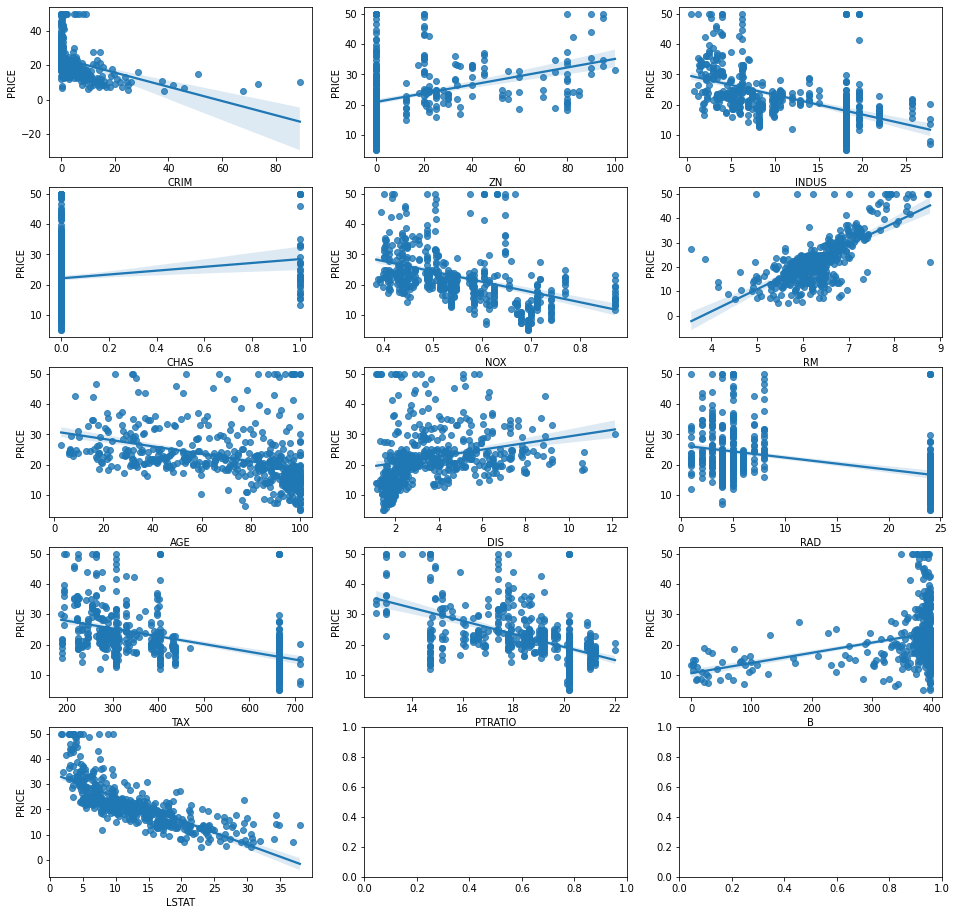

In [27]:
fig, axs = plt.subplots(figsize=(16,16),ncols=3,nrows=5)
x_features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i, feature in enumerate(x_features):
  row = int(i/3)
  col = i%3
  sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])